In [188]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./2017/feedback.csv')

In [189]:
# Clean up data a little bit to make next steps easier
# Delete rows with Rating (Num) == "ERROR!"
df = df.drop([1310,1322,1411], axis=0)

# Change Rating (Num) data type to int
df["Rating (Num)"] = pd.to_numeric(df["Rating (Num)"])

# strip space from schedule pacing
# df.rename(index=str, columns={"Schedule Pacing": "ScheduleSpacing"})


In [190]:
# df.rename(index=str, columns={"Schedule Pacing": "SchedulePacing"})
df.rename(columns={"Schedule Pacing": "SchedulePacing"}, inplace=True)
df.head()


,ID,Location,Track,Week,Rating (Num),SchedulePacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


### How many more promoters are there than detractors across our 2017 data?

In [161]:
prom = (df[df["Rating (Num)"] >= 9])
det = (df[df["Rating (Num)"] <= 6])
len(prom) - len(det)
# There are 639 more promoters than detractors in
# 2017 data

639

### Which track boasts the best promoter-to-detractor ratio?

In [162]:
# We can see below that we have 4 different tracks
# Since "Explorer" seems to be an elective track,
# We will only consider Apps, Games, and VR as main tracks
# We will not consider the nan entries
df.Track.unique()

array(['Apps, Explorer', 'Apps', 'Games', nan, 'VR', 'Games, Explorer'],
      dtype=object)

In [163]:
# Create new subset dataframes of apps, games, and VR
apps = df[(df['Track'] =='Apps, Explorer') | (df['Track'] == 'Apps')]
games = df[(df['Track'] =='Games, Explorer') | (df['Track'] == 'Games')]
VR = (df[df["Track"] == 'VR'])
tracks = [apps, games, VR]

In [200]:
# The array below indicates that the Games track has
# the highest promoter to detractor ratio (18.2)
ratios = []
for track in tracks:
    prom = (track[track["Rating (Num)"] >= 9])
    det = (track[track["Rating (Num)"] <= 6])
    ratio = len(prom) / (len(prom) + len(det))
    ratios.append(ratio)
ratios

[0.838351822503962, 0.9479768786127167, 0.9583333333333334]

Text(0.5, 1.0, 'Tracks vs Promoters/Detractors %')

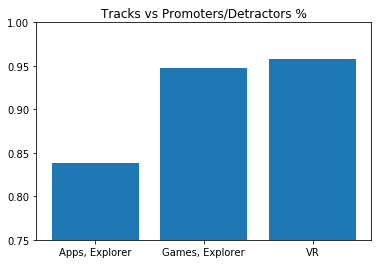

In [201]:
ratios_dict = {}
ratios_dict['Apps, Explorer'] = ratios[0]
ratios_dict['Games, Explorer'] = ratios[1]
ratios_dict['VR'] = ratios[2]

plt.bar(range(len(ratios_dict)), list(ratios_dict.values()), align='center')
plt.xticks(range(len(ratios_dict)), list(ratios_dict.keys()))
plt.ylim(0.75, 1)
plt.title('Tracks vs Promoters/Detractors %')

ratios_dict = {}
ratios_dict['Apps, Explorer'] = ratios[0]
ratios_dict['Games, Explorer'] = ratios[1]
ratios_dict['VR'] = ratios[2]

plt.bar(range(len(ratios_dict)), list(ratios_dict.values()), align='center')
plt.xticks(range(len(ratios_dict)), list(ratios_dict.keys()))
plt.ylim(0.75, 1)
plt.title('Tracks vs Promoters/Detriment')

In [165]:
# The percentage of approval ratings for the apps program is much lower than
# the other programs.  This could simply be because it is more fun and
# immediately rewarding to build games and VR instead of simple crud apps,
# however perhaps the apps program could be reconsidered to have the approval
# rating match the other programs

### Does the Explorer elective track improve the ratings of the core tracks?

In [166]:
expl_app = (df[df["Track"] == 'Apps, Explorer'])
only_apps = (df[df["Track"] == 'Apps'])
expl_games = (df[df["Track"] == 'Games, Explorer'])
only_games = (df[df["Track"] == 'Games'])

In [167]:
means = {}
means["Explore and Apps"] = expl_app["Rating (Num)"].mean()
means["Only Apps"] = only_apps["Rating (Num)"].mean()
means["Explore and Games"] = expl_games["Rating (Num)"].mean()
means["Only Games"] = only_games["Rating (Num)"].mean()
means


{'Explore and Apps': 8.116071428571429,
 'Only Apps': 8.357060849598163,
 'Explore and Games': 9.0,
 'Only Games': 8.745192307692308}

Text(0.5, 1.0, 'Tracks vs Ratings')

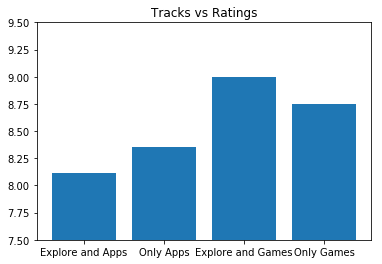

In [168]:
plt.bar(range(len(means)), list(means.values()), align='center')
plt.xticks(range(len(means)), list(means.keys()))
plt.ylim(7.5, 9.5)
plt.title('Tracks vs Ratings')

In [169]:
# As the apps program has a lower approval rating in general, it is difficult
# to determine if the explore cirriculum is liked or not.  It seems that in
# general the students in the game track are simply more excited about the 
# cirriculum than those in the app track.

### Does the student experience get better the longer that they are enrolled at the summer academy?

In [170]:
# To answer this question, we will take the mean
# rating value for each week.  One problem with this
# method, is that we are not accounting for dissatisfied
# students leaving the program.

# Here, we can see, that generally the student experience got better with
# more time spent in the summer academy
weeks = df.Week.unique()
means={}
for week in sorted(weeks):
    df_week = (df[df["Week"] == week])
    means[week] = df_week["Rating (Num)"].mean()
means

{'Week 1': 8.26736111111111,
 'Week 2': 8.347826086956522,
 'Week 3': 8.522821576763485,
 'Week 4': 8.33160621761658,
 'Week 5': 8.441340782122905,
 'Week 6': 8.541666666666666,
 'Week 7': 8.6,
 'Week 8': 9.11111111111111}

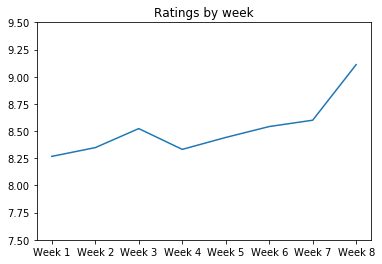

In [171]:
plt.plot(range(len(means)), list(means.values()))
plt.xticks(range(len(means)), list(means.keys()))

# axes = plt.gca()
# axes.set_ylim([7.5, 9.5])

# plt.plot instead of bars
plt.title('Ratings by week')
plt.ylim(7.5, 9.5)
plt.show()

In [172]:
# Although the data shows a slight slump in the week 4 cirriculum, in general,
# students seem to appreciate the cirriculum more as the spend more time in 
# the cirriculum

### Does student satisfaction vary by location?

In [173]:
# Once again, we will create a dict with the values being means.
# However this time, the means will be determined by location,
# instead of week
locs = df.Location.dropna().unique()
means ={}

for loc in locs:
    df_loc = (df[df["Location"] == loc])
    means[loc] = df_loc["Rating (Num)"].mean()
means

{'San Francisco': 8.458333333333334,
 'Los Angeles': 8.773584905660377,
 'New York City': 8.275757575757575,
 'Redwood City': 8.327586206896552,
 'Santa Clara': 8.318407960199005,
 'Oakland': 8.53191489361702,
 'Washington DC': 8.170212765957446,
 'Chicago': 8.485714285714286,
 'Atlanta': 9.121212121212121,
 'Hong Kong': 7.181818181818182,
 'Beijing': 8.948717948717949,
 'Tokyo': 8.246153846153845}

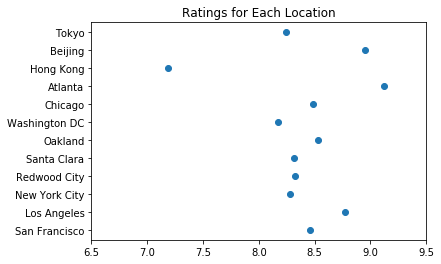

In [174]:
# plt.bar(range(len(means)), list(means.values()), align='center')
# plt.xticks(range(len(means)), list(means.keys()))

# plt.scatter(list(means.values()), range(len(means)))
plt.scatter(list(means.values()), list(means.keys()))


axes = plt.gca()
axes.set_xlim([6.5, 9.5])

plt.title('Ratings for Each Location')
plt.show()
# There is SOME variation with location, however it is pretty minimal.
# The most standout points are Hong Kong (low with 7.2) and Atlanta (high 9.1)


In [175]:
# Most locations fall into a reasonable data grouping, however Hong Kong is
# the obvious outlier.  This issue is possibly due to a language barrier,
# however action should be taken the determine the discrepancy.

# Other obvious outliers include Atlanta, Beiging, and LA.  The "language 
# barrier" hypothesis is contradicted by the good ratings in Hong Kong.
# It is reasonable to assume LA and Atlanta ratings indicate that the
# cirriculum is reasonably well received at priority targeted demographic.
# 
# The most important location at this time, was San Francisco.  The ratings
# are on the high side of neutral, but 
#
# What are ratings based on course pacing?


### Which curriculum has the best pacing? 

Rating (Num)
0     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SchedulePacing, dtype: object

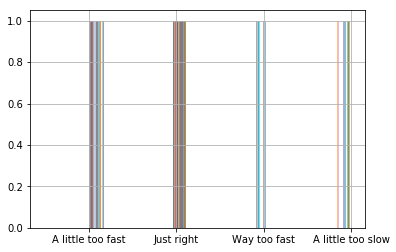

In [202]:
pace = ['Way too slow', 'A little too slow', 'Just right', 'A little too fast',
       'Way too fast']
df[df['Track'] == 'Apps'].groupby('Rating (Num)')['SchedulePacing'].hist(bins=16, alpha = .5)

### What is total NPS for 2017?

In [193]:
prom = (df[df["Rating (Num)"] >= 9])
det = (df[df["Rating (Num)"] <= 6])
neut = df[(df['Rating (Num)'] >= 7) & (df['Rating (Num)'] <= 8)]
print(len(prom), len(det), len(neut))

760 121 569


In [192]:
(len(prom) - len(det))/(len(prom) + len(det) + len(neut))

0.4406896551724138

In [196]:
nps = (len(prom) - len(det)) / (len(prom) + len(neut) + len(det))
nps

0.4406896551724138

In [ ]:
# NPS score for 2017 is 0.44.